# CNN: call classification based on sonogram images

This program test the ability of a convolutional neural network CNN to 

3) classify sonogram images from mouse lemur vocalizations (Multiclass classification problem)


### Created by Daniel Romero Mujalli, Sep2020

email: danielrm84@gmail.com

last update: 21_Jan_2021

# Step 3: CNN image classification

## Importing libraries

In [212]:
import numpy as np # arrays and vectors
import pandas as pd
import matplotlib.pyplot as plt # plotting methods
import os # create, load files directories
import cv2 # to read images

In [213]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12111315663083582033
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1576534016
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10214728867381297552
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [214]:
# test tensorflow access CuDNN
tf.compat.v1.Session()


## Data preparation or Data preprocessing

In [215]:
# load images
# define path locations
img_path = ["CNN_images/LW/"
            ,"CNN_images/TR/"
            ,"CNN_images/SW/" 
            ,"CNN_images/TS/"
            ,"CNN_images/ZP/"
           ]
    
#img_path = 'CNN_images/LW/'
# list all images in given path
os.listdir(img_path[4])

['6_27.png',
 '7_19.png',
 '6_16.png',
 '7_10.png',
 '267_2.png',
 '10_30.png',
 '7_23.png',
 '1_31.png',
 '6_6.png',
 '243_2.png',
 '11_18.png',
 '4_11.png',
 '10_24.png',
 '277_2.png',
 '8_15.png',
 '8_21.png',
 '6_14.png',
 '1_23.png',
 '8_29.png',
 '241_1.png',
 '7_20.png',
 '244_1.png',
 '5_23.png',
 '2_2.png',
 '11_20.png',
 '11_2.png',
 '3_23.png',
 '3_17.png',
 '11_1.png',
 '11_7.png',
 '237_2.png',
 '238_2.png',
 '261_2.png',
 '275_2.png',
 '263_1.png',
 '256_1.png',
 '236_1.png',
 '10_11.png',
 '10_20.png',
 '6_25.png',
 '2_1.png',
 '11_15.png',
 '4_21.png',
 '11_25.png',
 '9_6.png',
 '6_17.png',
 '11_16.png',
 '249_1.png',
 '1_5.png',
 '9_29.png',
 '9_31.png',
 '259_2.png',
 '245_2.png',
 '233_1.png',
 '3_6.png',
 '11_31.png',
 '5_27.png',
 '9_25.png',
 '11_8.png',
 '1_21.png',
 '9_27.png',
 '248_1.png',
 '1_1.png',
 '4_30.png',
 '275_1.png',
 '2_11.png',
 '268_1.png',
 '10_29.png',
 '10_28.png',
 '1_19.png',
 '11_26.png',
 '2_16.png',
 '1_13.png',
 '3_7.png',
 '2_21.png',
 

In [216]:
# testing numpy arrays

#foo = np.empty((3,4))
#goo = np.empty((3,4))
#print(foo)
#print(foo.shape)

#x = foo[np.newaxis, :, :]
#y = foo[np.newaxis, :, :]
#print(x.shape, " ", y.shape)

#print(np.concatenate((x,y)).shape)
a = (1,2)
print(a[1])

2


In [56]:
# define function to load all images from given folder
# return list
def load_images_from_folder(folder, class_name, img_size = None):
    # empty list to store images
    images = []
    for filename in os.listdir(folder):
        # read image using cv2 method. Takes as arguemnts: (filename, flag)
        img = cv2.imread(os.path.join(folder, filename), 0) # 0 = imread_grayscale; 1: color; -1: unchanged
        if(img is not None):
            if(img_size != None):
                cv2.resize(img, img_size)
            images.append([class_name, img])  
    return images

In [217]:
# alternative function
# return numpy array of shape (img number, pixel x, pixel y)
def load_image_data(folder, img_size = (200, 200), max_num_images = None):
    i = 0 # control of first element assigment
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), 0) # 0 = imread_grayscale; 1: color; -1: unchanged
        img = cv2.resize(img, img_size)                     # resize image
        #img = np.array(img)                                # as numpy array
        img = img[np.newaxis, :, :]                         # add one more dimension to track sample number
        if(i == 0):
            img_array = img
        else:
            img_array = np.concatenate((img_array, img))    # concatenate numpy arrays
        i += 1
        if(max_num_images is not None and i >= max_num_images): # break the loop 
            break
    return img_array

In [58]:
# testing the function

#lw = [s for s in img_path if s == "CNN_images/LW/"]
#print(lw)

#print(img_path[0])

#foo = load_image_data(folder = img_path[0], img_size = (200,200))

In [59]:
#foo.shape

In [60]:
#print("length of array of images ", foo.shape[0])
#print(foo[0])

In [218]:
# load LW images:
img_size = (128, 128)
n_images = 256
img_LW = load_image_data(img_path[0], img_size, n_images)
img_TR = load_image_data(img_path[1], img_size, n_images)
img_SW = load_image_data(img_path[2], img_size, n_images)
img_TS = load_image_data(img_path[3], img_size, n_images)
img_ZP = load_image_data(img_path[4], img_size, n_images)

In [219]:
print(img_LW)

[[[  1   1   0 ...   1   1   0]
  [  1   1   0 ...   0   0   1]
  [  1   1   1 ...   0   2   1]
  ...
  [ 75  64  66 ...  98 137  67]
  [179 210 194 ... 236 201 108]
  [114 137 173 ... 154 108  80]]

 [[  0   1   1 ...   1   0   0]
  [  0   1   0 ...   0   1   0]
  [  0   0   0 ...   0   1   1]
  ...
  [ 63  74  17 ...  58  27  56]
  [ 79  66  47 ... 199  90  97]
  [ 52  40  67 ...  33  78  72]]

 [[  0   1   1 ...   0   2   2]
  [  0   0   1 ...   1   1   0]
  [  1   2   0 ...   2   1   1]
  ...
  [ 66  41  66 ...  26  79  64]
  [ 80 112 165 ...  79 146 107]
  [ 97  52 120 ...  48  77  98]]

 ...

 [[  0   0   1 ...   1   0   0]
  [  0   1   1 ...   1   0   0]
  [  1   0   1 ...   2   0   0]
  ...
  [ 54  64  33 ...  35  61  41]
  [ 65 103  71 ... 149  91 127]
  [ 54  42  61 ...  87  46 105]]

 [[  6  11  16 ...   7   7   1]
  [  9   5   6 ...  15  13  12]
  [ 15  11  14 ...  12   7  10]
  ...
  [  9  16  25 ...   9  12  14]
  [  8   7   9 ...  24  16   8]
  [  8   8   5 ...   4   5  

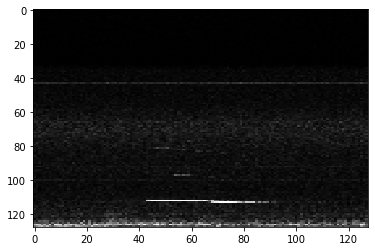

In [220]:
#and let's take a look at it
#from matplotlib import pyplot

plt.imshow(img_LW[0][:][:],        # the image data
           cmap = "gray",          # gray scale
           vmin = 0, vmax = 255,   # data range that the colormap covers
           aspect = "auto"         # draw image using fixed axis (this can result in nonsquare pixels! 
                                   # i.e., distortion)
          )

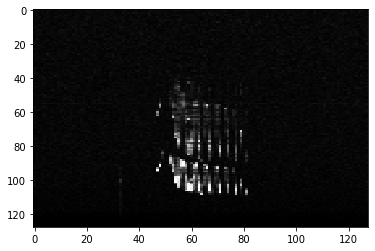

In [221]:
#Trills:
#from matplotlib import pyplot

plt.imshow(img_TR[2][:][:],        # the image data
           cmap = "gray",          # gray scale
           vmin = 0, vmax = 255,   # data range that the colormap covers
           aspect = "auto"         # draw image using fixed axis
           )

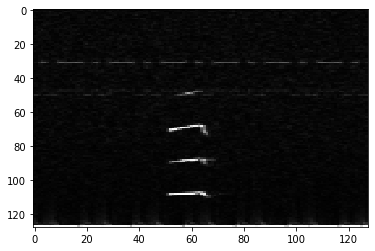

In [222]:
#Short whistles:
#from matplotlib import pyplot

plt.imshow(img_SW[0][:][:],        # the image data
           cmap = "gray",          # gray scale
           vmin = 0, vmax = 255,   # data range that the colormap covers
           aspect = "auto"         # draw image using fixed axis
           )

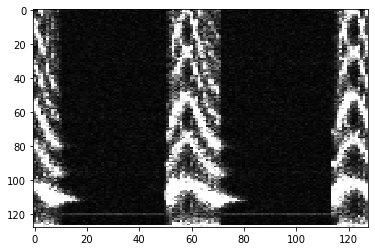

In [223]:
#Tsaks:
#from matplotlib import pyplot

plt.imshow(img_TS[0][:][:],        # the image data
           cmap = "gray",          # gray scale
           vmin = 0, vmax = 255,   # data range that the colormap covers
           aspect = "auto"         # draw image using fixed axis
           )

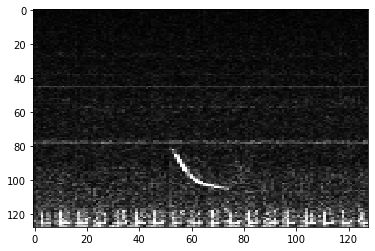

In [224]:
#Zips:
#from matplotlib import pyplot

plt.imshow(img_ZP[0][:][:],        # the image data
           cmap = "gray",          # gray scale
           vmin = 0, vmax = 255,   # data range that the colormap covers
           aspect = "auto"         # draw image using fixed axis
           )

In [225]:
print("check the shape of the image data:")
print("img LW: ", img_LW.shape)
print("img TR: ", img_TR.shape)
print("img SW: ", img_SW.shape)
print("img TS: ", img_TS.shape)
print("img ZP: ", img_ZP.shape)

# create target labels as lists
lw = ["lw"] * img_LW.shape[0]
tr = ["tr"] * img_TR.shape[0]
sw = ["sw"] * img_SW.shape[0]
ts = ["ts"] * img_TS.shape[0]
zp = ["zp"] * img_ZP.shape[0]

print("the shape (length) of target label:")
print("LW: ", len(lw))
print("TR: ", len(tr))
print("SW: ", len(sw))
print("TS: ", len(ts))
print("ZP: ", len(zp))

check the shape of the image data:
img LW:  (256, 128, 128)
img TR:  (100, 128, 128)
img SW:  (256, 128, 128)
img TS:  (256, 128, 128)
img ZP:  (256, 128, 128)
the shape (length) of target label:
LW:  256
TR:  100
SW:  256
TS:  256
ZP:  256


In [226]:
# APPEND ALL IMAGE DATA: TARGET + FEATURES
features = np.concatenate(
                            (img_LW, img_TR, img_SW, img_TS, img_ZP)
                         )

# check shape
print(features.shape)

(1124, 128, 128)


In [227]:
# list append, appends single value; list extend, for multiple values
# lw.extend([tr + sw + ts + zp) # one possibility
# another,
target = lw + tr + sw + ts + zp

# check shape of target labels
print(len(target))

1124


In [228]:
# (OBSOLETE) convert to numpy array before using the sklearn StratifiedShuffleSplit method
#features = np.array(img_LW, dtype = "object")
#labels = np.array(lw)

#print("features, labels shape: ", features.shape, ", ", labels.shape)

In [229]:
# encode the labels
# we use a sklearn preprossesing method: label encoder
# we follow import declare use
# Note that label variable is also called target
from sklearn import preprocessing

# label encoder le
# declare object
le = preprocessing.LabelEncoder() # a label encoder

# use object
label = le.fit(target)

# convert to numerical
target = le.transform(target)

labels = target

print(target)

[0 0 0 ... 4 4 4]


In [230]:
# convert categorical labels to binary class matrix (One Hot Encoding OHE)
# here we use a method from the keras module
from tensorflow.keras.utils import to_categorical

target = to_categorical(target)

print(target)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [231]:
# release some memory
del img_LW, img_TR, img_SW, img_TS, img_ZP, lw, tr, sw, ts, zp

##  Train Test Split

Here it is recommended to split each block of images at a time. Example, split img_LW, then trills, and so on

In [232]:
# In order to have a balance data: i.e., same proportion of classes in both, train and test sets
# we import the class StratifiedShuffleSplit from sklearn.model_selection
# Again: import, declare, use
from sklearn.model_selection import StratifiedShuffleSplit

# declare Stratefied... object with 20% data assign to validation (test) set
sss = StratifiedShuffleSplit(n_splits = 1
                            ,test_size = 0.2
                            ,random_state = 0)


# split the data based on the sss object
for train_index, test_index in sss.split(features, target):
    features_train = features[train_index] # data in features selected for training
    features_test  = features[test_index] # data in features selected for testing
    target_train   = target  [train_index] # data in labels selected for training
    target_test    = target  [test_index] # data in labels selected for testing

# print shapes of train and test data sets. Test data is 20% of original
print("Training features shape: ", features_train.shape)
print("Training target labels shape: ", target_train.shape)
print("Test features shape: ", features_test.shape)
print("Test target labels shape: ", target_test.shape)

Training features shape:  (899, 128, 128)
Training target labels shape:  (899, 5)
Test features shape:  (225, 128, 128)
Test target labels shape:  (225, 5)


In [233]:
# check value range of image data
# should be minimum 0, maximum 255

print("maximum pixel value: ", np.max(features_train))
print("minimum pixel value: ", np.amin(features_train))

maximum pixel value:  255
minimum pixel value:  0


In [234]:
# the value range of image data is [0, 255] of integer type
# it can be convenient to convert the data type to float32 and normalize the data in range (0, 1)
# to speed up calculations during the learning process of the CNN model
features_train = features_train.astype("float32")    # change data type to float32
features_train /= 255  # maximum pixel intensity value (see above)
features_test = features_test.astype("float32")
features_test /= 255

print(features_train[0][:][:])
print("features shape: ", features_train.shape)

[[0.01176471 0.00784314 0.01960784 ... 0.00784314 0.01176471 0.01960784]
 [0.         0.00392157 0.01568628 ... 0.01960784 0.00784314 0.01960784]
 [0.00784314 0.01176471 0.01960784 ... 0.01176471 0.01176471 0.01176471]
 ...
 [0.87058824 0.7882353  0.2901961  ... 0.5764706  1.         0.8745098 ]
 [0.2509804  0.37254903 0.08627451 ... 0.38431373 0.49019608 0.32156864]
 [0.12156863 0.1764706  0.28235295 ... 0.21960784 0.37254903 0.09803922]]
features shape:  (899, 128, 128)


we need to explicitly declare the depth of the image representation array: in the case of grayscale images there is only one channel, and this dimension is 1.

We use the utility function image_data_format() from keras backend utilities to discover the convention ('channels_first' or 'channels_last') of our current system.

Depending on the backend (Theano or TensorFlow), the depth dimension is either the first or the last to be declared:

In [235]:
# make sure keras is using tensorflow and not theano. 
# This impacts the way to represent the data dimentions for the learning process below
# import keras # deprecated
import tensorflow.keras as keras
#from keras import backend as K # needed for image_data_format()

img_rows = features.shape[1]
img_cols = features.shape[2]

if keras.backend.image_data_format() == 'channels_first':
    features_train = features_train.reshape(features_train.shape[0], 1, img_rows, img_cols)
    features_test = features_test.reshape(features_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    features_train = features_train.reshape(features_train.shape[0], img_rows, img_cols, 1)
    features_test = features_test.reshape(features_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print("Modified array dimensions:")
print("training: ", features_train.shape)
print("test set: ", features_test.shape)
print(input_shape)  

Modified array dimensions:
training:  (899, 128, 128, 1)
test set:  (225, 128, 128, 1)
(128, 128, 1)


In [236]:
# check number of labels
print("number of labels: ", target_test.shape[1])

number of labels:  5


## Building the CNN model

### Define the architecture 

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# sequentially build the model
model = models.Sequential()

# add layers
model.add(Conv2D( filters = 32         # number of output filters in the convolution 
                 ,kernel_size = (3,3)  # height and width of the 2d convolution windows
                 ,padding = "same"     # padding "relleno": "valid" = without padding; "same": pad with zeros
                 ,activation = "relu"  # no negative numbers
                 ,input_shape = input_shape #(features_train.shape[1]  # when None: image can vary in size (width pixels)
                                 #,features_train.shape[2] # when None: image can vary in size (height pixels)
                                 #, n_channels = 1)     # only one channel (grey scale), otherwise, three (RGB color)
                )
         )
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
#model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = target_train.shape[1], activation = "softmax"))

In [238]:
# Take a look at the network topology
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 655365    
Total params: 655,685
Trainable params: 655,685
Non-trainable params: 0
_________________________________________________________________
None


In [239]:
# Model compile
model.compile(loss='categorical_crossentropy'
              , optimizer='Adam'
              , metrics=['accuracy'])

In [240]:
# Parameter values, training scenario:
num_epochs = 100

## Train and test the model

In [241]:
# model fit
history = model.fit(
                      features_train
                    , target_train
                    , epochs = num_epochs
                    , batch_size = 128
                    , verbose = 1
                    )

Epoch 1/100
8/8 [==============================] - 1s 97ms/step - loss: 1.2020 - accuracy: 0.4190
Epoch 2/100
8/8 [==============================] - 1s 90ms/step - loss: 0.4228 - accuracy: 0.9087
Epoch 3/100
8/8 [==============================] - 1s 90ms/step - loss: 0.1909 - accuracy: 0.9690
Epoch 4/100
8/8 [==============================] - 1s 90ms/step - loss: 0.0843 - accuracy: 0.9867
Epoch 5/100
8/8 [==============================] - 1s 91ms/step - loss: 0.0471 - accuracy: 0.9938
Epoch 6/100
8/8 [==============================] - 1s 91ms/step - loss: 0.0267 - accuracy: 0.9981
Epoch 7/100
8/8 [==============================] - 1s 91ms/step - loss: 0.0402 - accuracy: 0.9936
Epoch 8/100
8/8 [==============================] - 1s 92ms/step - loss: 0.0218 - accuracy: 0.9991
Epoch 9/100
8/8 [==============================] - 1s 91ms/step - loss: 0.0166 - accuracy: 0.9984
Epoch 10/100
8/8 [==============================] - 1s 91ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 11/100
8/8 [=

8/8 [==============================] - 1s 90ms/step - loss: 2.2331e-04 - accuracy: 1.0000
Epoch 83/100
8/8 [==============================] - 1s 89ms/step - loss: 2.5302e-04 - accuracy: 1.0000
Epoch 84/100
8/8 [==============================] - 1s 89ms/step - loss: 2.2457e-04 - accuracy: 1.0000
Epoch 85/100
8/8 [==============================] - 1s 89ms/step - loss: 2.1153e-04 - accuracy: 1.0000
Epoch 86/100
8/8 [==============================] - 1s 89ms/step - loss: 2.2762e-04 - accuracy: 1.0000
Epoch 87/100
8/8 [==============================] - 1s 90ms/step - loss: 1.7767e-04 - accuracy: 1.0000
Epoch 88/100
8/8 [==============================] - 1s 89ms/step - loss: 1.8027e-04 - accuracy: 1.0000
Epoch 89/100
8/8 [==============================] - 1s 89ms/step - loss: 2.1482e-04 - accuracy: 1.0000
Epoch 90/100
8/8 [==============================] - 1s 89ms/step - loss: 2.1870e-04 - accuracy: 1.0000
Epoch 91/100
8/8 [==============================] - 1s 90ms/step - loss: 1.9913e-04 - 

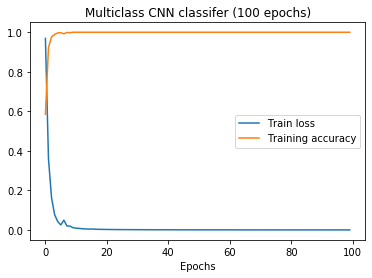

In [242]:
# custom fuction to plot history dictionary
def plot_loss_history(h, title):
    plt.plot(h.history["loss"], label = "Train loss")
    plt.plot(h.history["accuracy"], label = "Training accuracy")
    plt.xlabel("Epochs")
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, "Multiclass CNN classifer ({} epochs)".format(num_epochs))

In [243]:
# confusion matrix
# using sklearn metrics
from sklearn.metrics import confusion_matrix

predictions = model.predict(features_test)
#print(predictions)

predicted_classes = np.argmax(model.predict(features_test), axis = -1)
predicted_classes = predicted_classes.reshape(len(predicted_classes),1)
#print(predicted_classes)

#print(target)
target = pd.DataFrame(target)
#print(target)
target_classes = target.iloc[test_index].to_numpy()
#print(target_classes)
# target_classes still one-hot encoded. Converting to single digit:
target_classes = np.argmax(target_classes, axis = -1)
#print(target_classes)

#print(predicted_classes)
con_mat_df = confusion_matrix(target_classes, predicted_classes, labels = [0, 1, 2, 3, 4])
print("\nConfusion matrix")
print(con_mat_df)


Confusion matrix
[[51  0  0  0  0]
 [ 0 51  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 51  0]
 [ 0  0  0  0 52]]


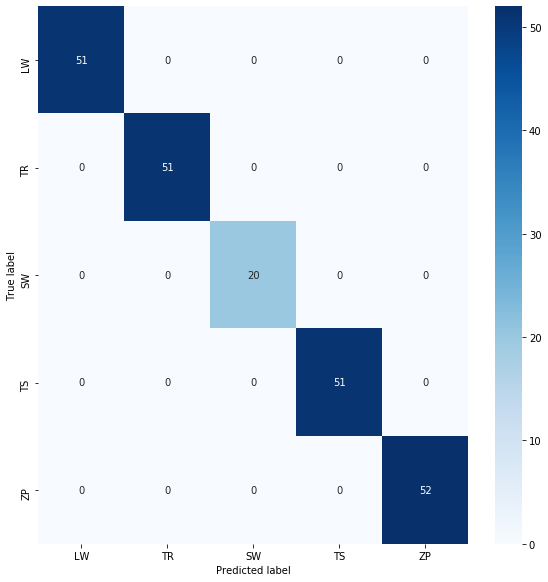

In [244]:
import seaborn as sn

names = ["LW", "TR", "SW", "TS", "ZP"]
figure = plt.figure(figsize = (8, 8))
sn.heatmap(con_mat_df, annot = True, cmap = plt.cm.Blues, xticklabels = names, yticklabels = names)
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()